<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

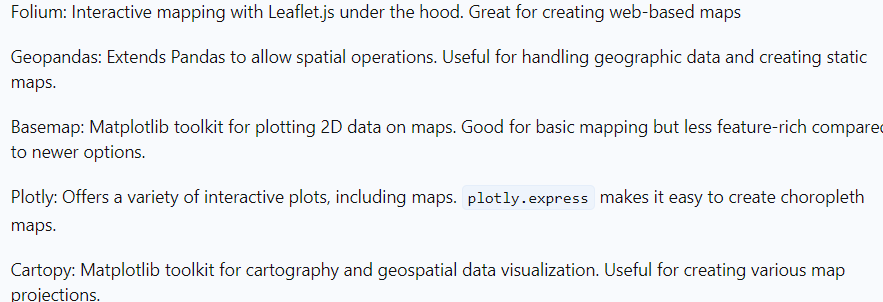

## Dataset Loading

In [4]:
# Raw Data
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [5]:
# Cleaned Data
arango_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arangco_0718.csv"
arango_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0719.csv"
arango_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0721.csv"
bajaro_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bajaro_0713.csv"
belga_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0711.csv"
belga_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0717.csv"
bolata_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bolata_0719.csv"
caralde_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/caralde_0717.csv"
carmelotes_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/carmelotes_0712.csv"
ceballos_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ceballos_0718.csv"
delosreyes_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/delosreyes_0718.csv"
deocareza_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/deocareza_0711.csv"
escuerdos_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0712.csv"
escuerdos_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0713.csv"
fontillas_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/fontillas_0718.csv"
gipa_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0719.csv"
gipa_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0721.csv"
graceda_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0711.csv"
graceda_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0712.csv"
graceda_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0713.csv"
lina_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/lina_0718.csv"
loy_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/loy_0719.csv"
manuel_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/manuel_0711.csv"
neri_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0712.csv"
neri_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0713.csv"
neri_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0718.csv"
ostan_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0712.csv"
ostan_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0713.csv"
paralde_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/paralde_0711.csv"
porquez_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/porquez_0719.csv"
ubusan_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ubusan_0721.csv"

In [6]:
df_1_0711 = pd.read_csv(belga_0711)
df_1_0711['bus_dispatched'] = 3;
df_1_0711['bus_driver'] = 3

df_2_0711 = pd.read_csv(deocareza_0711)
df_2_0711['bus_dispatched'] = 1
df_2_0711['bus_driver'] = 1

df_3_0711 = pd.read_csv(graceda_0711)
df_3_0711['bus_dispatched'] = 2;
df_3_0711['bus_driver'] = 2

df_4_0711 = pd.read_csv(manuel_0711)
df_4_0711['bus_dispatched'] = 4;
df_4_0711['bus_driver'] = 4

df_5_0711 = pd.read_csv(paralde_0711)
df_5_0711['bus_dispatched'] = 5;
df_5_0711['bus_driver'] = 5

df_0711 = pd.concat([df_1_0711, df_2_0711, df_3_0711, df_4_0711, df_5_0711],
                    ignore_index=True)

In [7]:
df_1_0712 = pd.read_csv(graceda_0712)
df_1_0712['bus_dispatched'] = 6;
df_1_0712['bus_driver'] = 2;

df_2_0712 = pd.read_csv(neri_0712)
df_2_0712['bus_dispatched'] =10;
df_2_0712['bus_driver'] = 9;

df_3_0712 = pd.read_csv(ostan_0712)
df_3_0712['bus_dispatched'] = 8;
df_3_0712['bus_driver'] = 7;

df_4_0712 = pd.read_csv(carmelotes_0712)
df_4_0712['bus_dispatched'] = 9;
df_4_0712['bus_driver'] = 8;

df_5_0712 = pd.read_csv(escuerdos_0712)
df_5_0712['bus_dispatched'] = 7;
df_5_0712['bus_driver'] = 6;

df_0712 = pd.concat([df_1_0712, df_2_0712, df_3_0712, df_4_0712, df_5_0712],
                    ignore_index=True)

In [8]:
df_1_0713 = pd.read_csv(escuerdos_0713)
df_1_0713['bus_dispatched'] = 14;
df_1_0713['bus_driver'] = 6;

df_2_0713 = pd.read_csv(neri_0713)
df_2_0713['bus_dispatched'] =13;
df_2_0713['bus_driver'] = 9;

df_3_0713 = pd.read_csv(ostan_0713)
df_3_0713['bus_dispatched'] = 12;
df_3_0713['bus_driver'] = 7;

df_4_0713 = pd.read_csv(graceda_0713)
df_4_0713['bus_dispatched'] = 11;
df_4_0713['bus_driver'] = 2;

df_5_0713 = pd.read_csv(bajaro_0713)
df_5_0713['bus_dispatched'] = 15;
df_5_0713['bus_driver'] = 10;

df_0713 = pd.concat([df_1_0713, df_2_0713, df_3_0713, df_4_0713, df_5_0713],
               ignore_index=True)

In [9]:
df_1_0717 = pd.read_csv(belga_0717)
df_1_0717['bus_dispatched'] = 17;
df_1_0717['bus_driver'] = 3;

df_2_0717 = pd.read_csv(caralde_0717)
df_2_0717['bus_dispatched'] =16;
df_2_0717['bus_driver'] = 11;

df_0717 = pd.concat([df_1_0717, df_2_0717], ignore_index=True)

In [10]:
df_1_0718 = pd.read_csv(arango_0718)
df_1_0718['bus_dispatched'] = 23;
df_1_0718['bus_driver'] = 16;

df_2_0718 = pd.read_csv(neri_0718)
df_2_0718['bus_dispatched'] =18;
df_2_0718['bus_driver'] = 9;

df_3_0718 = pd.read_csv(lina_0718)
df_3_0718['bus_dispatched'] = 20;
df_3_0718['bus_driver'] = 13;

df_4_0718 = pd.read_csv(fontillas_0718)
df_4_0718['bus_dispatched'] = 19;
df_4_0718['bus_driver'] = 12;

df_5_0718 = pd.read_csv(delosreyes_0718)
df_5_0718['bus_dispatched'] = 21;
df_5_0718['bus_driver'] = 14;

df_6_0718 = pd.read_csv(ceballos_0718)
df_6_0718['bus_dispatched'] = 22;
df_6_0718['bus_driver'] = 15;

df_0718 = pd.concat([df_1_0718, df_2_0718, df_3_0718, df_4_0718, df_5_0718,
                df_6_0718], ignore_index=True)

In [11]:
df_1_0719 = pd.read_csv(arango_0719)
df_1_0719['bus_dispatched'] = 27;
df_1_0719['bus_driver'] = 16;

df_2_0719 = pd.read_csv(bolata_0719)
df_2_0719['bus_dispatched'] =28;
df_2_0719['bus_driver'] = 20;

df_3_0719 = pd.read_csv(gipa_0719)
df_3_0719['bus_dispatched'] = 25;
df_3_0719['bus_driver'] = 18;

df_4_0719 = pd.read_csv(loy_0719)
df_4_0719['bus_dispatched'] = 26;
df_4_0719['bus_driver'] = 19;

df_5_0719 = pd.read_csv(porquez_0719)
df_5_0719['bus_dispatched'] = 24;
df_5_0719['bus_driver'] = 17;

df_0719 = pd.concat([df_1_0719, df_2_0719, df_3_0719, df_4_0719, df_5_0719],
                    ignore_index=True)

In [12]:
df_1_0721 = pd.read_csv(arango_0721)
df_1_0721['bus_dispatched'] = 31;
df_1_0721['bus_driver'] = 16;

df_2_0721 = pd.read_csv(gipa_0721)
df_2_0721['bus_dispatched'] =29;
df_2_0721['bus_driver'] = 18;

df_3_0721 = pd.read_csv(ubusan_0721)
df_3_0721['bus_dispatched'] =30;
df_3_0721['bus_driver'] = 21;

df_0721 = pd.concat([df_1_0721, df_2_0721, df_3_0721], ignore_index=True)

In [13]:
df = pd.concat([df_0711, df_0712, df_0713, df_0717, df_0718, df_0719, df_0721],
               ignore_index=True)

In [14]:
df.sample(10)

longitude   latitude            timestamp  Board  Alight  Numpass  \
1054110  120.990375  14.523197  2023-07-19 16:54:39      0       0     28.0   
790509   121.055437  14.583505  2023-07-18 09:07:45      0       0     21.0   
64438    121.037823  14.643910  2023-07-11 04:59:10      0       0     29.0   
855392   121.034938  14.554870  2023-07-18 13:11:22      0       0     20.0   
659747   121.045903  14.568112  2023-07-17 12:02:31      0       0     24.0   
688686   121.028563  14.549333  2023-07-17 06:14:31      0       0     21.0   
1197121  121.059660  14.598965  2023-07-19 19:17:25      0       0     22.0   
833154   121.035635  14.646825  2023-07-18 06:32:19      0       0     57.0   
875139   121.046380  14.569413  2023-07-18 10:18:08      0       0     14.0   
280052   121.036662  14.556223  2023-07-12 19:22:27      0       0     45.0   

         Hour   Min   Sec  Day_of_week  ...   direction  QuarterHour  \
1054110  16.0  54.0  39.0            2  ...  Southbound            9   
790509    9.0   7.0  45.0            1  ...  Northbound            1   
64438     4.0  59.0  10.0            1  ...  Northbound           10   
855392   13.0  11.0  22.0            1  ...  Northbound            2   
659747   12.0   2.0  31.0            0  ...  Northbound            0   
688686    6.0  14.0  31.0            0  ...  Northbound            2   
1197121  19.0  17.0  25.0            2  ...  Southbound            3   
833154    6.0  32.0  19.0            1  ...  Southbound            5   
875139   10.0  18.0   8.0            1  ...  Northbound            3   
280052   19.0  22.0  27.0            2  ...  Northbound            0   

         northbound_waiting_passengers  southbound_waiting_passengers  \
1054110                            NaN                            NaN   
790509                             NaN                            NaN   
64438                              0.0                            0.0   
855392                             NaN                            NaN   
659747                             NaN                            NaN   
688686                             NaN                            NaN   
1197121                            NaN                            NaN   
833154                             NaN                            NaN   
875139                             NaN                            NaN   
280052                             NaN                            NaN   

         bus_dispatched bus_driver  accelY...21  DRIVER  driver  \
1054110              27         16          NaN     NaN     NaN   
790509               18          9          NaN     NaN     NaN   
64438                 1          1        157.0     NaN     NaN   
855392               20         13          NaN     NaN     NaN   
659747               17          3          NaN     NaN     NaN   
688686               16         11          NaN     NaN     NaN   
1197121              26         19          NaN     NaN     NaN   
833154               20         13          NaN     NaN     NaN   
875139               19         12          NaN     NaN     NaN   
280052               10          9          NaN     NaN     NaN   

         waiting_passengers  
1054110                 0.0  
790509                  0.0  
64438                   NaN  
855392                  0.0  
659747                  0.0  
688686                  0.0  
1197121                 0.0  
833154                  0.0  
875139                  0.0  
280052                  0.0  

[10 rows x 25 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [16]:
df.describe()

longitude      latitude         Board        Alight       Numpass  \
count  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06   
mean   1.210164e+02  1.458254e+01  1.202710e-02  1.261060e-02  2.342261e+01   
std    2.480509e-02  5.413315e-02  1.090067e-01  1.115866e-01  1.622190e+01   
min    1.209834e+02  1.450272e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.209914e+02  1.453725e+01  0.000000e+00  0.000000e+00  1.300000e+01   
50%    1.210119e+02  1.456513e+01  0.000000e+00  0.000000e+00  2.100000e+01   
75%    1.210392e+02  1.464474e+01  0.000000e+00  0.000000e+00  3.200000e+01   
max    1.210608e+02  1.473059e+01  1.000000e+00  1.000000e+00  1.240000e+02   

               Hour           Min           Sec   Day_of_week  stop_cluster  \
count  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06   
mean   1.317312e+01  2.945211e+01  2.948634e+01  1.879884e+00  9.221755e+00   
std    5.064981e+00  1.725546e+01  1.730206e+01  1.118137e+00  5.879407e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.000000e+00  1.500000e+01  1.400000e+01  1.000000e+00  4.000000e+00   
50%    1.300000e+01  2.900000e+01  3.000000e+01  2.000000e+00  9.000000e+00   
75%    1.700000e+01  4.400000e+01  4.400000e+01  3.000000e+00  1.400000e+01   
max    2.300000e+01  5.900000e+01  5.900000e+01  5.000000e+00  2.000000e+01   

       ...  distance_from_cluster_18  dist_change_cluster_0  \
count  ...              1.374479e+06           1.374448e+06   
mean   ...              8.793703e+00          -1.101246e-05   
std    ...              6.115880e+00           4.098702e-01   
min    ...              1.184367e-03          -1.652432e+01   
25%    ...              2.958139e+00           0.000000e+00   
50%    ...              8.417759e+00           0.000000e+00   
75%    ...              1.571583e+01           0.000000e+00   
max    ...              2.513408e+01           1.661382e+01   

       dist_change_cluster_18   QuarterHour  northbound_waiting_passengers  \
count            1.374448e+06  1.374479e+06                  230426.000000   
mean             3.787546e-05  4.568506e+00                       0.059859   
std              5.031941e-01  3.320567e+00                       0.660993   
min             -1.652018e+01  0.000000e+00                       0.000000   
25%              0.000000e+00  1.000000e+00                       0.000000   
50%              0.000000e+00  4.000000e+00                       0.000000   
75%              0.000000e+00  7.000000e+00                       0.000000   
max              1.661288e+01  1.000000e+01                      12.000000   

       southbound_waiting_passengers  bus_dispatched    bus_driver  \
count                  230426.000000    1.374479e+06  1.374479e+06   
mean                        0.041224    1.606601e+01  1.009295e+01   
std                         0.654215    9.194897e+00  6.098520e+00   
min                         0.000000    1.000000e+00  1.000000e+00   
25%                         0.000000    8.000000e+00  5.000000e+00   
50%                         0.000000    1.600000e+01  9.000000e+00   
75%                         0.000000    2.500000e+01  1.600000e+01   
max                        16.000000    3.100000e+01  2.100000e+01   

        accelY...21  waiting_passengers  
count  61611.000000        1.144053e+06  
mean      30.736346        9.058933e-02  
std       57.791832        9.800164e-01  
min     -338.000000        0.000000e+00  
25%        5.000000        0.000000e+00  
50%       15.000000        0.000000e+00  
75%       37.000000        0.000000e+00  
max      866.000000        3.000000e+01  

[8 rows x 21 columns]

In [17]:
df.isnull().sum()

longitude                              0
latitude                               0
timestamp                              0
Board                                  0
Alight                                 0
Numpass                                0
Hour                                   0
Min                                    0
Sec                                    0
Day_of_week                            0
stop_cluster                           0
distance_from_cluster_0                0
distance_from_cluster_18               0
dist_change_cluster_0                 31
dist_change_cluster_18                31
direction                            192
QuarterHour                            0
northbound_waiting_passengers    1144053
southbound_waiting_passengers    1144053
bus_dispatched                         0
bus_driver                             0
accelY...21                      1312868
DRIVER                           1333317
driver                           1339446
waiting_passengers                230426
dtype: int64

In [18]:
df.duplicated().sum()

1154

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [20]:
cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec', 'bus_dispatched',
        'bus_driver']
# cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec']

In [21]:
df = df[cols]

In [22]:
df.sample(10)

longitude   latitude            timestamp  Board  Alight  Numpass  \
62291    120.999513  14.537498  2023-07-11 04:25:01      0       0     16.0   
1158656  121.034793  14.554583  2023-07-19 08:17:49      0       0     21.0   
1160179  121.051018  14.620290  2023-07-19 08:43:23      0       0     14.0   
237297   121.020168  14.657537  2023-07-12 06:01:35      0       0     56.0   
1295326  121.004127  14.657313  2023-07-21 09:23:04      0       0     38.0   
10153    121.035313  14.555282  2023-07-11 06:43:59      0       0     34.0   
136058   120.990983  14.536598  2023-07-11 08:02:29      0       0     22.0   
105245   121.053933  14.613538  2023-07-11 16:44:37      0       0     35.0   
609147   121.047332  14.628017  2023-07-13 10:36:28      0       0     21.0   
162679   120.990530  14.508563  2023-07-11 19:59:33      0       0      0.0   

         Hour   Min   Sec  bus_dispatched  bus_driver  
62291     4.0  25.0   1.0               1           1  
1158656   8.0  17.0  49.0              26          19  
1160179   8.0  43.0  23.0              26          19  
237297    6.0   1.0  35.0               6           2  
1295326   9.0  23.0   4.0              29          18  
10153     6.0  43.0  59.0               3           3  
136058    8.0   2.0  29.0               2           2  
105245   16.0  44.0  37.0               1           1  
609147   10.0  36.0  28.0              15          10  
162679   19.0  59.0  33.0               2           2

In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', errors='coerce')
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [24]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [25]:
df.isna().sum()

longitude         0
latitude          0
timestamp         0
Board             0
Alight            0
Numpass           0
Hour              0
Min               0
Sec               0
bus_dispatched    0
bus_driver        0
Time              0
datePH            0
Day_of_week       0
dtype: int64

In [26]:
df.duplicated().sum()

2381

In [27]:
df.dropna(inplace = True)

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
# Specific Bus Stops
Monumento = (14.658796024391433, 120.98613030490293)
Bagong_Barrio = (14.658962098122908, 120.99840409277799)
Balintawak = (14.657632440251607, 121.00489616829053)
Kaingin = (14.659207715596748, 121.01043239008315)
Roosevelt = (14.65946031850859, 121.01960427287607)
North_Avenue = (14.651404132967716, 121.03290009938868)
Quezon_Avenue = (14.64156852785517, 121.03927593922376)
Mega_Q_Mart = (14.629060928076612, 121.04671379361375)
Main_Avenue = (14.615051484903669, 121.05341714648678)
Santolan = (14.609827993592939, 121.05501086998106)
Ortigas = (14.589274921830608, 121.05698223579455)
Guadalupe = (14.567240858915584, 121.04520617378073)
Buendia = (14.557616094605738, 121.03343011212988)
Ayala = (14.549698211553858, 121.02900386156698)
One_Ayala_Terminal = (14.550471629678954, 121.02787120603641)
Tramo = (14.540645092074023, 121.00359742139625)
Taft_Avenue = (14.538392473279682, 120.99945327510484)
Roxas_Boulevard = (14.53706735510947, 120.99218776274249)
MOA = (14.53684543526199, 120.98357811498406)
Macapagal_Bradco_Avenue = (14.5300528927701, 120.98961227061899)
City_of_Dreams = (14.524975658136254, 120.99059974706373)
Ayala_Malls_Manila_Bay = (14.523068542733853, 120.99008185576514)
PITX_Terminal = (14.510338360322828, 120.99126572649949)

bus_stops = [Monumento, Bagong_Barrio, Balintawak, Kaingin, Roosevelt, North_Avenue,
             Quezon_Avenue, Mega_Q_Mart, Main_Avenue, Santolan, Ortigas, Guadalupe,
             Buendia, Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue, Roxas_Boulevard,
             MOA, Macapagal_Bradco_Avenue, City_of_Dreams, Ayala_Malls_Manila_Bay,
             PITX_Terminal]


In [30]:
'''from sklearn.cluster import KMeans

k = 23 # Currently 23 bus stops in total whether NB or SB

initial_centroids = np.array([Monumento, Bagong_Barrio, Balintawak, Kaingin,
                              Roosevelt, North_Avenue, Quezon_Avenue, Mega_Q_Mart,
                              Main_Avenue, Santolan, Ortigas, Guadalupe, Buendia,
                              Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue,
                              Roxas_Boulevard, MOA, Macapagal_Bradco_Avenue,
                              City_of_Dreams, Ayala_Malls_Manila_Bay, PITX_Terminal])

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1, random_state=42)
# kmeans = KMeans(n_clusters=21, random_state=42)'''

'from sklearn.cluster import KMeans\n\nk = 23 # Currently 23 bus stops in total whether NB or SB\n\ninitial_centroids = np.array([Monumento, Bagong_Barrio, Balintawak, Kaingin,\n                              Roosevelt, North_Avenue, Quezon_Avenue, Mega_Q_Mart,\n                              Main_Avenue, Santolan, Ortigas, Guadalupe, Buendia,\n                              Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue,\n                              Roxas_Boulevard, MOA, Macapagal_Bradco_Avenue,\n                              City_of_Dreams, Ayala_Malls_Manila_Bay, PITX_Terminal])\n\n# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns\nkmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1, random_state=42)\n# kmeans = KMeans(n_clusters=21, random_state=42)'

In [31]:
from geopy.distance import geodesic

def find_nearest_bus_stop(row, bus_stops):
    passenger_location = (row['latitude'], row['longitude'])
    distances = [geodesic(passenger_location, stop).meters for stop in bus_stops]
    nearest_stop_idx = np.argmin(distances)
    return nearest_stop_idx  # Returns the index of the nearest bus stop

In [32]:
# Apply the function only to rows where Board == True
df.loc[df['Board'] == True, 'nearest_bus_stop'] = df[df['Board'] == True].apply(
    find_nearest_bus_stop, axis=1, bus_stops=bus_stops
)

# Optional: If you want to map to bus stop names, you can add this step
# df.loc[df['Board'] == True, 'nearest_bus_stop_name'] = df.loc[df['Board'] == True, 'nearest_bus_stop'].map(lambda x: bus_stop_names[x])


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372098 entries, 0 to 1374478
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   longitude         1372098 non-null  float64       
 1   latitude          1372098 non-null  float64       
 2   timestamp         1372098 non-null  datetime64[ns]
 3   Board             1372098 non-null  int64         
 4   Alight            1372098 non-null  int64         
 5   Numpass           1372098 non-null  float64       
 6   Hour              1372098 non-null  int32         
 7   Min               1372098 non-null  int32         
 8   Sec               1372098 non-null  int32         
 9   bus_dispatched    1372098 non-null  int64         
 10  bus_driver        1372098 non-null  int64         
 11  Time              1372098 non-null  object        
 12  datePH            1372098 non-null  object        
 13  Day_of_week       1372098 non-null  int32      

In [34]:
df['nearest_bus_stop'].bfill(inplace = True)

In [35]:
df[df['Board']==True]

longitude   latitude           timestamp  Board  Alight  Numpass  \
18       120.988783  14.507963 2023-07-11 04:01:13      1       0     15.0   
28       120.988768  14.507970 2023-07-11 04:01:22      1       0     16.0   
312      120.990620  14.524773 2023-07-11 04:05:48      1       0     16.0   
504      120.988995  14.535418 2023-07-11 04:08:44      1       0     16.0   
524      120.988997  14.535923 2023-07-11 04:09:03      1       0     17.0   
...             ...        ...                 ...    ...     ...      ...   
1373956  121.020132  14.657702 2023-07-21 18:23:32      1       0     51.0   
1373958  121.020132  14.657702 2023-07-21 18:23:33      1       0     52.0   
1373959  121.020132  14.657702 2023-07-21 18:23:34      1       0     53.0   
1373963  121.020132  14.657702 2023-07-21 18:23:37      1       0     54.0   
1373966  121.020132  14.657702 2023-07-21 18:23:39      1       0     55.0   

         Hour  Min  Sec  bus_dispatched  bus_driver      Time      datePH  \
18          4    1   13               3           3  04:01:13  2023-07-11   
28          4    1   22               3           3  04:01:22  2023-07-11   
312         4    5   48               3           3  04:05:48  2023-07-11   
504         4    8   44               3           3  04:08:44  2023-07-11   
524         4    9    3               3           3  04:09:03  2023-07-11   
...       ...  ...  ...             ...         ...       ...         ...   
1373956    18   23   32              30          21  18:23:32  2023-07-21   
1373958    18   23   33              30          21  18:23:33  2023-07-21   
1373959    18   23   34              30          21  18:23:34  2023-07-21   
1373963    18   23   37              30          21  18:23:37  2023-07-21   
1373966    18   23   39              30          21  18:23:39  2023-07-21   

         Day_of_week  nearest_bus_stop  
18                 1              22.0  
28                 1              22.0  
312                1              20.0  
504                1              17.0  
524                1              17.0  
...              ...               ...  
1373956            4               4.0  
1373958            4               4.0  
1373959            4               4.0  
1373963            4               4.0  
1373966            4               4.0  

[16523 rows x 15 columns]

In [36]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [37]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [38]:
'''centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")'''

'centroids = kmeans.cluster_centers_\nfor i, centroid in enumerate(centroids):\n    print(f"Cluster {i}: {centroid}")'

In [39]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [40]:
df.head()

longitude   latitude           timestamp  Board  Alight  Numpass  Hour  \
0  120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0     4   
1  120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0     4   
2  120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0     4   
3  120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0     4   
4  120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0     4   

   Min  Sec  bus_dispatched  bus_driver      Time      datePH  Day_of_week  \
0    0   55               3           3  04:00:55  2023-07-11            1   
1    0   56               3           3  04:00:56  2023-07-11            1   
2    0   57               3           3  04:00:57  2023-07-11            1   
3    0   58               3           3  04:00:58  2023-07-11            1   
4    0   59               3           3  04:00:59  2023-07-11            1   

   nearest_bus_stop  
0              22.0  
1              22.0  
2              22.0  
3              22.0  
4              22.0

In [41]:
# Define the coordinates for the end clusters (example values)
northmost_coords = Monumento  # Example coordinates for cluster 0 (northmost terminal)
southmost_coords = PITX_Terminal  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_north'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], northmost_coords[0], northmost_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_south'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], southmost_coords[0], southmost_coords[1]), axis=1)

    return df

In [42]:
df = calculate_distance_from_terminals(df)

In [43]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_north' and 'distance_from_south' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_north'] = df['distance_from_north'].diff()
    df['dist_change_south'] = df['distance_from_south'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_north'] < 0 else 'Southbound' if row['dist_change_south'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()
    df['direction'] = df['direction'].bfill()

    return df

In [44]:
df = determine_direction_based_on_terminals(df)
df

longitude   latitude           timestamp  Board  Alight  Numpass  \
0        120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0   
1        120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0   
2        120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0   
3        120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0   
4        120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0   
...             ...        ...                 ...    ...     ...      ...   
1374474  120.986592  14.657210 2023-07-21 18:33:39      0       0      0.0   
1374475  120.986592  14.657210 2023-07-21 18:33:40      0       0      0.0   
1374476  120.986592  14.657210 2023-07-21 18:33:41      0       0      0.0   
1374477  120.986592  14.657210 2023-07-21 18:33:42      0       0      0.0   
1374478  120.986592  14.657210 2023-07-21 18:33:43      0       0      0.0   

         Hour  Min  Sec  bus_dispatched  bus_driver      Time      datePH  \
0           4    0   55               3           3  04:00:55  2023-07-11   
1           4    0   56               3           3  04:00:56  2023-07-11   
2           4    0   57               3           3  04:00:57  2023-07-11   
3           4    0   58               3           3  04:00:58  2023-07-11   
4           4    0   59               3           3  04:00:59  2023-07-11   
...       ...  ...  ...             ...         ...       ...         ...   
1374474    18   33   39              30          21  18:33:39  2023-07-21   
1374475    18   33   40              30          21  18:33:40  2023-07-21   
1374476    18   33   41              30          21  18:33:41  2023-07-21   
1374477    18   33   42              30          21  18:33:42  2023-07-21   
1374478    18   33   43              30          21  18:33:43  2023-07-21   

         Day_of_week  nearest_bus_stop  distance_from_north  \
0                  1              22.0            16.774200   
1                  1              22.0            16.775764   
2                  1              22.0            16.777120   
3                  1              22.0            16.777459   
4                  1              22.0            16.777266   
...              ...               ...                  ...   
1374474            4               NaN             0.183207   
1374475            4               NaN             0.183207   
1374476            4               NaN             0.183207   
1374477            4               NaN             0.183207   
1374478            4               NaN             0.183207   

         distance_from_south  dist_change_north  dist_change_south   direction  
0                   0.356173                NaN                NaN  Northbound  
1                   0.368564           0.001563           0.012392  Northbound  
2                   0.374506           0.001356           0.005942  Northbound  
3                   0.375901           0.000339           0.001395  Northbound  
4                   0.376412          -0.000193           0.000510  Northbound  
...                      ...                ...                ...         ...  
1374474            16.339125           0.000000           0.000000  Northbound  
1374475            16.339125           0.000000           0.000000  Northbound  
1374476            16.339125           0.000000           0.000000  Northbound  
1374477            16.339125           0.000000           0.000000  Northbound  
1374478            16.339125           0.000000           0.000000  Northbound  

[1372098 rows x 20 columns]

In [45]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [46]:
df = assign_quarter_hour(df)
df.sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
745293   121.051745  14.617383 2023-07-18 15:03:23      0       0     17.0   
642503   121.032757  14.650948 2023-07-13 19:43:34      0       0      0.0   
237993   121.038960  14.641515 2023-07-12 06:13:03      0       0     46.0   
1366361  120.989502  14.511028 2023-07-21 15:49:14      0       0      5.0   
1336593  121.041015  14.638975 2023-07-21 23:36:24      0       0     14.0   
632212   120.988788  14.536045 2023-07-13 16:54:32      0       0     44.0   
175965   121.009495  14.657330 2023-07-11 10:35:13      0       0     22.0   
663011   120.984345  14.657192 2023-07-17 12:54:24      0       0      0.0   
647911   121.012063  14.538862 2023-07-17 07:59:05      0       0     19.0   
949738   120.990560  14.518830 2023-07-18 17:01:09      0       0      3.0   

         Hour  Min  Sec  bus_dispatched  ...      Time      datePH  \
745293     15    3   23              23  ...  15:03:23  2023-07-18   
642503     19   43   34              15  ...  19:43:34  2023-07-13   
237993      6   13    3               6  ...  06:13:03  2023-07-12   
1366361    15   49   14              30  ...  15:49:14  2023-07-21   
1336593    23   36   24              29  ...  23:36:24  2023-07-21   
632212     16   54   32              15  ...  16:54:32  2023-07-13   
175965     10   35   13               4  ...  10:35:13  2023-07-11   
663011     12   54   24              17  ...  12:54:24  2023-07-17   
647911      7   59    5              17  ...  07:59:05  2023-07-17   
949738     17    1    9              21  ...  17:01:09  2023-07-18   

        Day_of_week  nearest_bus_stop  distance_from_north  \
745293            1               8.0             8.428363   
642503            3              22.0             5.091278   
237993            2               7.0             5.999459   
1366361           4              22.0            16.435026   
1336593           4               0.0             6.302454   
632212            3              19.0            13.652287   
175965            1               4.0             2.518759   
663011            0               0.0             0.262132   
647911            0              10.0            13.624923   
949738            1              22.0            15.570821   

         distance_from_south  dist_change_north  dist_change_south  \
745293             13.566271           0.006144          -0.002662   
642503             16.260162           0.003208          -0.004526   
237993             15.462887           0.000918          -0.000453   
1366361             0.204815           0.002819          -0.002717   
1336593            15.272877          -0.012172           0.009495   
632212              2.870860           0.000578          -0.000654   
175965             16.462025           0.012357           0.001293   
663011             16.346310           0.002683          -0.002542   
647911              3.882134          -0.000839           0.010205   
949738              0.947267           0.000000           0.000000   

          direction QuarterHour  
745293   Southbound           0  
642503   Southbound           7  
237993   Southbound           2  
1366361  Southbound           8  
1336593  Northbound           6  
632212   Southbound           9  
175965   Southbound           6  
663011   Southbound           9  
647911   Northbound          10  
949738   Southbound           0  

[10 rows x 21 columns]

In [47]:
def add_boarding_counts_per_cluster(df):
    """
    Adds a single column 'waiting_passengers' that records the number of passengers waiting to board
    at each stop cluster, depending on the direction (northbound or southbound), at each quarter-hour.

    Args:
    - df: DataFrame that contains the columns 'nearest_bus_stop', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'waiting_passengers' column
    """
    # Initialize the waiting passengers column
    df['waiting_passengers'] = 0

    # Group by nearest_bus_stop, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['nearest_bus_stop', 'direction', 'Hour', 'QuarterHour']):
        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        # Assign the count to the 'waiting_passengers' column for the entire group
        df.loc[group.index, 'waiting_passengers'] = waiting_count

    return df

In [48]:
df = add_boarding_counts_per_cluster(df)

In [49]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'waiting_passengers' column to subtract one from the cumulative count
    when a passenger boards at a specific stop cluster and direction.

    Args:
    - df: DataFrame that contains the columns 'nearest_bus_stop', 'Board', 'waiting_passengers', 'direction'

    Returns:
    - DataFrame with updated 'waiting_passengers' column
    """
    # Initialize a dictionary to keep track of cumulative waiting passengers for each (nearest_bus_stop, direction) pair
    cumulative_waiting = {}

    for idx, row in df.iterrows():
        cluster = row['nearest_bus_stop']
        direction = row['direction']

        # Create a unique key based on nearest_bus_stop and direction
        key = (cluster, direction)

        # Initialize the waiting passenger count for this (nearest_bus_stop, direction) pair if not already done
        if key not in cumulative_waiting:
            cumulative_waiting[key] = row['waiting_passengers']

        # If a passenger boards (Board == True), decrease the count for this (nearest_bus_stop, direction)
        if row['Board']:
            cumulative_waiting[key] = max(0, cumulative_waiting[key] - 1)

        # Update the waiting_passengers column in the dataframe
        df.at[idx, 'waiting_passengers'] = cumulative_waiting[key]

    return df

In [50]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [51]:
df.head()

longitude   latitude           timestamp  Board  Alight  Numpass  Hour  \
0  120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0     4   
1  120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0     4   
2  120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0     4   
3  120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0     4   
4  120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0     4   

   Min  Sec  bus_dispatched  ...      datePH Day_of_week nearest_bus_stop  \
0    0   55               3  ...  2023-07-11           1             22.0   
1    0   56               3  ...  2023-07-11           1             22.0   
2    0   57               3  ...  2023-07-11           1             22.0   
3    0   58               3  ...  2023-07-11           1             22.0   
4    0   59               3  ...  2023-07-11           1             22.0   

   distance_from_north  distance_from_south  dist_change_north  \
0            16.774200             0.356173                NaN   
1            16.775764             0.368564           0.001563   
2            16.777120             0.374506           0.001356   
3            16.777459             0.375901           0.000339   
4            16.777266             0.376412          -0.000193   

   dist_change_south   direction  QuarterHour waiting_passengers  
0                NaN  Northbound            0                 15  
1           0.012392  Northbound            0                 15  
2           0.005942  Northbound            0                 15  
3           0.001395  Northbound            0                 15  
4           0.000510  Northbound            0                 15  

[5 rows x 22 columns]

In [52]:
df[df['Board'] == 1].sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
1201583  120.990443  14.523135 2023-07-19 20:33:35      1       0     26.0   
6655     120.986990  14.657173 2023-07-11 05:47:36      1       0     22.0   
1026174  121.028823  14.550217 2023-07-19 08:31:23      1       0     13.0   
531742   121.020252  14.657753 2023-07-13 15:52:30      1       0     50.0   
1150786  121.019537  14.657607 2023-07-19 06:06:51      1       0     47.0   
275891   120.991432  14.536768 2023-07-12 17:54:04      1       0     17.0   
864578   121.019627  14.657627 2023-07-18 07:21:41      1       0     75.0   
155312   120.998062  14.657287 2023-07-11 18:00:10      1       0     23.0   
1283953  121.019750  14.657522 2023-07-21 05:53:17      1       0     29.0   
191251   121.035130  14.650010 2023-07-11 18:58:02      1       0     65.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
1201583    20   33   35              26  ...  2023-07-19           2   
6655        5   47   36               3  ...  2023-07-11           1   
1026174     8   31   23              27  ...  2023-07-19           2   
531742     15   52   30              12  ...  2023-07-13           3   
1150786     6    6   51              26  ...  2023-07-19           2   
275891     17   54    4              10  ...  2023-07-12           2   
864578      7   21   41              19  ...  2023-07-18           1   
155312     18    0   10               2  ...  2023-07-11           1   
1283953     5   53   17              29  ...  2023-07-21           4   
191251     18   58    2               4  ...  2023-07-11           1   

        nearest_bus_stop  distance_from_north  distance_from_south  \
1201583             21.0            15.091967             1.425662   
6655                 0.0             0.202759            16.333782   
1026174             13.0            12.917913             6.000463   
531742               4.0             3.672456            16.685937   
1150786              4.0             3.596143            16.655687   
275891              17.0            13.580850             2.938929   
864578               4.0             3.605737            16.659645   
155312               1.0             1.294447            16.356256   
1283953              4.0             3.619432            16.650605   
191251               5.0             5.361043            16.232293   

         dist_change_north  dist_change_south   direction  QuarterHour  \
1201583           0.000000           0.000000  Southbound            5   
6655              0.000000           0.000000  Southbound            8   
1026174           0.000000           0.000000  Northbound            5   
531742            0.000000           0.000000  Northbound            9   
1150786           0.000000           0.000000  Southbound            1   
275891           -0.000503           0.000563  Northbound            9   
864578            0.000000           0.000000  Southbound            0   
155312            0.000000           0.000000  Southbound            0   
1283953           0.000000           0.000000  Southbound            9   
191251            0.000000           0.000000  Northbound           10   

        waiting_passengers  
1201583                  0  
6655                     0  
1026174                  0  
531742                   0  
1150786                  0  
275891                   0  
864578                   0  
155312                   0  
1283953                  0  
191251                   0  

[10 rows x 22 columns]

In [53]:
df.sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
619197   120.989048  14.536142 2023-07-13 13:19:51      0       0     20.0   
566579   121.039307  14.641683 2023-07-13 09:10:05      0       0     43.0   
51434    120.997520  14.657352 2023-07-11 18:18:01      0       0     48.0   
78252    121.020127  14.657790 2023-07-11 08:45:53      0       0     27.0   
806828   120.985960  14.657147 2023-07-18 14:09:40      0       0      0.0   
955238   121.052478  14.616683 2023-07-18 18:43:29      0       0     66.0   
956784   120.991835  14.657308 2023-07-18 19:08:52      0       0     35.0   
1246564  121.058138  14.604160 2023-07-21 13:48:25      0       0     10.0   
797056   121.010413  14.538868 2023-07-18 10:55:10      0       0     16.0   
1190696  121.056265  14.586263 2023-07-19 17:29:47      0       0     39.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
619197     13   19   51              15  ...  2023-07-13           3   
566579      9   10    5              11  ...  2023-07-13           3   
51434      18   18    1               3  ...  2023-07-11           1   
78252       8   45   53               1  ...  2023-07-11           1   
806828     14    9   40              18  ...  2023-07-18           1   
955238     18   43   29              21  ...  2023-07-18           1   
956784     19    8   52              21  ...  2023-07-18           1   
1246564    13   48   25              31  ...  2023-07-21           4   
797056     10   55   10              18  ...  2023-07-18           1   
1190696    17   29   47              26  ...  2023-07-19           2   

        nearest_bus_stop  distance_from_north  distance_from_south  \
619197              17.0            13.642164             2.879100   
566579               6.0             6.028859            15.492947   
51434                0.0             1.235728            16.360975   
78252                0.0             3.658888            16.687437   
806828               0.0             0.184320            16.334313   
955238               7.0             8.537004            13.536268   
956784               0.0             0.635593            16.342426   
1246564              8.0             9.845239            12.674233   
797056              16.0            13.588940             3.783123   
1190696             10.0            11.044950            10.964350   

         dist_change_north  dist_change_south   direction  QuarterHour  \
619197           -0.003314           0.003250  Northbound            3   
566579            0.000000           0.000000  Northbound            2   
51434             0.000000           0.000000  Northbound            3   
78252            -0.003741          -0.001422  Northbound            8   
806828            0.000000           0.000000  Southbound            1   
955238           -0.006120           0.006160  Northbound            7   
956784           -0.015157           0.000301  Northbound            1   
1246564          -0.010411           0.005177  Northbound            8   
797056            0.000000           0.000000  Southbound           10   
1190696          -0.000824           0.003542  Northbound            4   

        waiting_passengers  
619197                   0  
566579                   0  
51434                    0  
78252                    0  
806828                   0  
955238                   0  
956784                   0  
1246564                  0  
797056                   0  
1190696                  0  

[10 rows x 22 columns]

In [54]:
# df.to_csv('ubusan_0721.csv', index=False)
df.to_csv('summary_all.csv', index=False)

In [55]:
df[df['Numpass'] == 0]

longitude   latitude           timestamp  Board  Alight  Numpass  \
5939     120.986328  14.657212 2023-07-11 05:35:58      0       1      0.0   
5940     120.986328  14.657212 2023-07-11 05:35:58      0       0      0.0   
5941     120.986328  14.657212 2023-07-11 05:35:59      0       0      0.0   
5942     120.986328  14.657212 2023-07-11 05:36:00      0       0      0.0   
5943     120.986328  14.657212 2023-07-11 05:36:01      0       0      0.0   
...             ...        ...                 ...    ...     ...      ...   
1374474  120.986592  14.657210 2023-07-21 18:33:39      0       0      0.0   
1374475  120.986592  14.657210 2023-07-21 18:33:40      0       0      0.0   
1374476  120.986592  14.657210 2023-07-21 18:33:41      0       0      0.0   
1374477  120.986592  14.657210 2023-07-21 18:33:42      0       0      0.0   
1374478  120.986592  14.657210 2023-07-21 18:33:43      0       0      0.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
5939        5   35   58               3  ...  2023-07-11           1   
5940        5   35   58               3  ...  2023-07-11           1   
5941        5   35   59               3  ...  2023-07-11           1   
5942        5   36    0               3  ...  2023-07-11           1   
5943        5   36    1               3  ...  2023-07-11           1   
...       ...  ...  ...             ...  ...         ...         ...   
1374474    18   33   39              30  ...  2023-07-21           4   
1374475    18   33   40              30  ...  2023-07-21           4   
1374476    18   33   41              30  ...  2023-07-21           4   
1374477    18   33   42              30  ...  2023-07-21           4   
1374478    18   33   43              30  ...  2023-07-21           4   

        nearest_bus_stop  distance_from_north  distance_from_south  \
5939                 0.0             0.177463            16.340200   
5940                 0.0             0.177463            16.340200   
5941                 0.0             0.177463            16.340200   
5942                 0.0             0.177463            16.340200   
5943                 0.0             0.177463            16.340200   
...                  ...                  ...                  ...   
1374474              NaN             0.183207            16.339125   
1374475              NaN             0.183207            16.339125   
1374476              NaN             0.183207            16.339125   
1374477              NaN             0.183207            16.339125   
1374478              NaN             0.183207            16.339125   

         dist_change_north  dist_change_south   direction  QuarterHour  \
5939                   0.0                0.0  Northbound            6   
5940                   0.0                0.0  Northbound            6   
5941                   0.0                0.0  Northbound            6   
5942                   0.0                0.0  Northbound            6   
5943                   0.0                0.0  Northbound            6   
...                    ...                ...         ...          ...   
1374474                0.0                0.0  Northbound            5   
1374475                0.0                0.0  Northbound            5   
1374476                0.0                0.0  Northbound            5   
1374477                0.0                0.0  Northbound            5   
1374478                0.0                0.0  Northbound            5   

        waiting_passengers  
5939                     0  
5940                     0  
5941                     0  
5942                     0  
5943                     0  
...                    ...  
1374474                  0  
1374475                  0  
1374476                  0  
1374477                  0  
1374478                  0  

[128070 rows x 22 columns]

In [56]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['nearest_bus_stop'].value_counts()

nearest_bus_stop
4.0     192
7.0     141
6.0     138
8.0     132
1.0     129
5.0     117
0.0     116
13.0    114
16.0    101
10.0     83
11.0     78
17.0     65
3.0      49
14.0     41
12.0     30
2.0      26
21.0     15
9.0      13
18.0     10
15.0      7
22.0      3
Name: count, dtype: int64

# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [57]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['nearest_bus_stop'].value_counts()

df[df['Board'] == 1]['nearest_bus_stop'].value_counts()

nearest_bus_stop
0.0     1326
22.0    1291
4.0     1238
10.0    1183
7.0     1109
8.0     1084
5.0     1067
16.0    1035
14.0    1009
17.0     940
13.0     910
1.0      875
6.0      792
11.0     727
18.0     372
12.0     357
2.0      254
21.0     246
3.0      242
9.0      164
19.0     123
15.0     102
20.0      77
Name: count, dtype: int64

In [58]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [59]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]
print(map_center)
map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

[14.60415252402754, 121.01977695125646]


In [60]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['nearest_bus_stop']}"
    ).add_to(marker_cluster)

cluster_map

In [61]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['nearest_bus_stop']}"
    ).add_to(map)
map

In [62]:
#Waiting Time
#Overcrowding (Heuristic)

In [63]:
df['direction'] = df['direction'].replace({'Northbound': 1, 'Southbound': 0})

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372098 entries, 0 to 1374478
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   longitude            1372098 non-null  float64       
 1   latitude             1372098 non-null  float64       
 2   timestamp            1372098 non-null  datetime64[ns]
 3   Board                1372098 non-null  int64         
 4   Alight               1372098 non-null  int64         
 5   Numpass              1372098 non-null  float64       
 6   Hour                 1372098 non-null  int32         
 7   Min                  1372098 non-null  int32         
 8   Sec                  1372098 non-null  int32         
 9   bus_dispatched       1372098 non-null  int64         
 10  bus_driver           1372098 non-null  int64         
 11  Time                 1372098 non-null  object        
 12  datePH               1372098 non-null  object        
 13  Da

In [65]:
df.drop(columns = ['timestamp', 'Time', 'datePH']).corr()['waiting_passengers'].abs().sort_values(ascending=False)

waiting_passengers     1.000000
bus_dispatched         0.099540
bus_driver             0.081885
Hour                   0.073340
Day_of_week            0.054675
direction              0.022469
nearest_bus_stop       0.019517
QuarterHour            0.016921
distance_from_south    0.016515
Min                    0.015070
distance_from_north    0.014935
latitude               0.014708
longitude              0.012760
Numpass                0.008396
Board                  0.001945
Alight                 0.001238
Sec                    0.000679
dist_change_south      0.000102
dist_change_north      0.000044
Name: waiting_passengers, dtype: float64

## Model training (for Fleet Managers)

In [66]:
df.dropna(inplace = True)

In [81]:
X = df[['Hour', 'Min','direction', 'Day_of_week','nearest_bus_stop']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# XGBoost Regression Model

xg_model = xgb.XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth = 9, min_child_weight = 1, n_estimators=  200, reg_lambda = 1.5, subsample= 1.0, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [88]:
# Random Forest Regressor
rf_model = RandomForestRegressor(bootstrap = True, max_depth = 20, max_features = 'sqrt',
                                 min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200,
                                 random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)

## Model Evaluation

In [89]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.2978775251132423
XGBoost RMSE: 0.2983343333802938
0.7965987472508538
0.7959744930267334


In [71]:
demand_model = rf_model

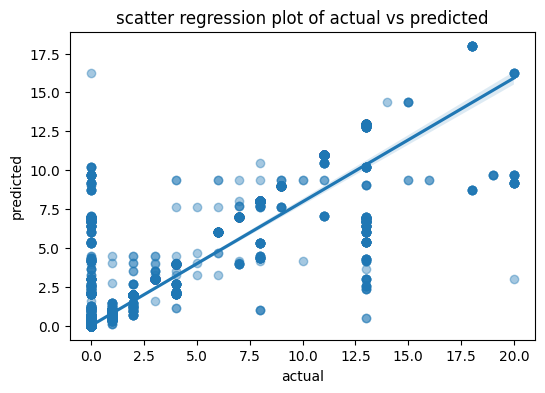

In [72]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

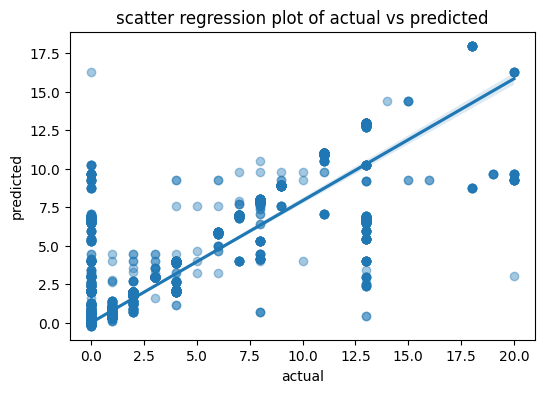

In [90]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=xg_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model training (for Driver Simulation)

In [73]:
df.dropna(inplace = True)

In [74]:
X = df[['Hour', 'direction', 'Min', 'Sec', 'Day_of_week', 'longitude','latitude','nearest_bus_stop']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [77]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.051015218526955584
XGBoost RMSE: 0.19348541285974444
0.9940340768833491
0.9141827821731567


In [78]:
demand_model_driver = rf_model

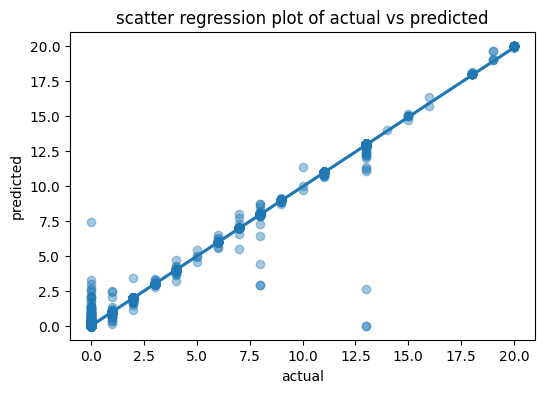

In [79]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model Testing

In [2]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 1) & (df['Min'] == 15) & df['Day_of_week'] = ]['nearest_bus_stop'].value_counts()

SyntaxError: invalid syntax (<ipython-input-2-18a057023359>, line 1)

In [ ]:
X = df[['Hour', 'Min', 'direction', 'Date', 'Sec', 'Day_of_week', 'nearest_bus_stop']]

In [ ]:
print

In [ ]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model.predict([[i, j, 1, 1, 0]]))

In [ ]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, xg_model.predict([[i, j, 1, 1, 10]]))